In [1]:
import pandas as pd
import matplotlib.pyplot as pyplot
%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *


extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/more_sites/results'
else:
    path = '/results'

### To answer the referee

### Keeping pi constant across all sites

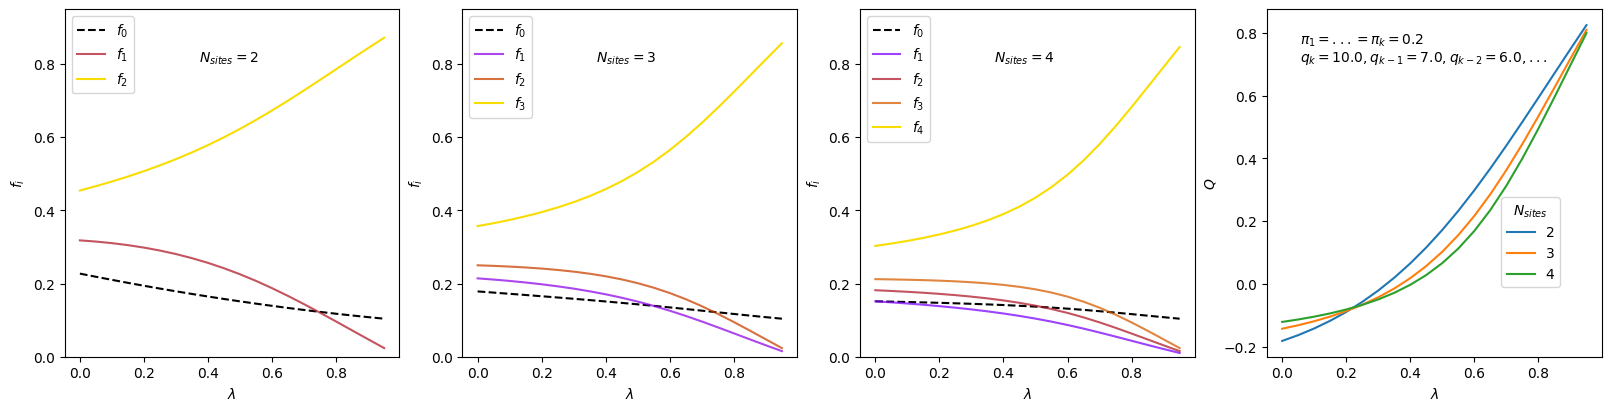

In [18]:
Nsitess = [2,3,4]
pi = 0.2
qk = 10.0
qkmin1 = 7.0
dq = 1.0

if len(Nsitess) == 2 or len(Nsitess) == 3:
    fig, ax = plt.subplots(1,len(Nsitess)+1, figsize=((len(Nsitess)+1)*4,4), constrained_layout=True)
    for i in range(len(Nsitess)+1):
        ax[i].set_xlabel('$\lambda$')
    for i in range(len(Nsitess)):
        ax[i].set_ylabel('$f_i$')
        ax[i].set_ylim(0.0,0.95)
    ax[-1].set_ylabel('$Q$')


for j,(Nsites) in enumerate(Nsitess):
    fs_colors = plt.cm.gnuplot(np.linspace(0,0.95,Nsites+1))
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[j].plot(df['l'], df[f'f0'], ls='--', color=fs_colors[0], label='$f_0$')
    for k in range(1,Nsites):
        # varying alpha:
        # ax[j].plot(df['l'], df[f'f{k}'], label=f'$f_{k}$', color=fs_colors[k], alpha=1.0-k*0.3)
        # constant alpha:
        ax[j].plot(df['l'], df[f'f{k}'], label=f'$f_{k}$', color=fs_colors[k], alpha=0.75)
    ax[j].plot(df['l'], df[f'f{Nsites}'], color=fs_colors[-1], label=f'$f_{Nsites}$')
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[-1].plot(df['l'], df['Q'], label=Nsites)
    ax[j].text(0.4,0.85, rf'$N_{{sites}} = {Nsites}$', transform=ax[j].transAxes)
    ax[j].legend()
ax[-1].text(0.10, 0.9, rf'$\pi_1 = ... = \pi_k = {pi}$', transform = ax[-1].transAxes)
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$', transform = ax[-1].transAxes)
ax[-1].legend(title=r'$N_{sites}$', loc=(0.7,0.2))
fig.savefig(f'varNsites_up_to_{Nsitess[-1]}_pi_const_{pi}_qk_{qk}_qkmin1_{qkmin1}_dq_{dq}.png')

### just f0, fk and consensus

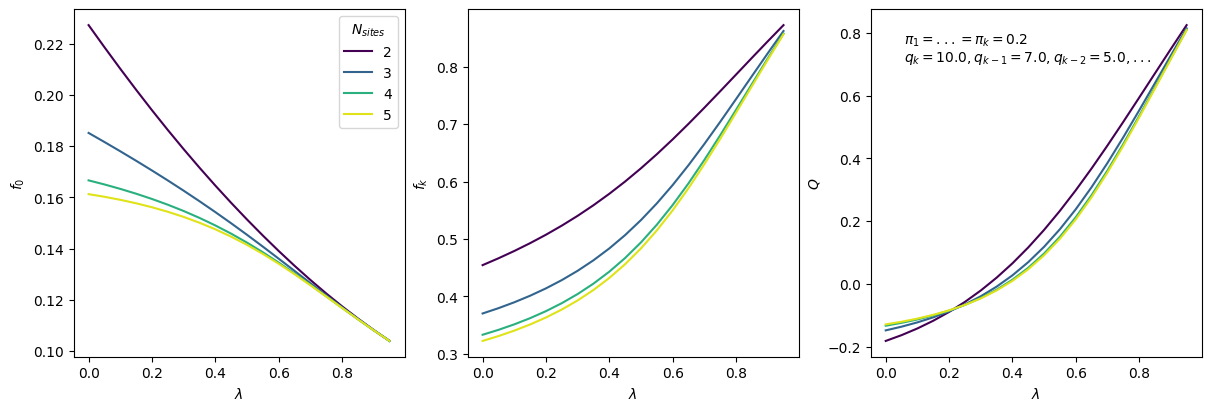

In [23]:
Nsitess = [2,3,4,5]
Nsites_colors = plt.cm.viridis(np.linspace(0,0.95,len(Nsitess)))
pi = 0.2
qk = 10.0
qkmin1 = 7.0
dq = 2.0

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for i in range(3):
    ax[i].set_xlabel('$\lambda$')
ax[0].set_ylabel('$f_0$')
ax[1].set_ylabel('$f_k$')
ax[2].set_ylabel('$Q$')

for Nsites,Nsc in zip(Nsitess,Nsites_colors):
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[0].plot(df['l'], df[f'f0'], color=Nsc, label=Nsites)
    ax[1].plot(df['l'], df[f'f{Nsites}'], color=Nsc)
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[2].plot(df['l'], df['Q'], color=Nsc)
ax[0].legend(title=r'$N_{sites}$')
ax[-1].text(0.10, 0.9, rf'$\pi_1 = ... = \pi_k = {pi}$', transform = ax[-1].transAxes)
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$', transform = ax[-1].transAxes)
fig.savefig(f'varNsites_pi_const_{pi}_qk_{qk}_qkmin1_{qkmin1}_dq_{dq}_compare_f0_fk.png')


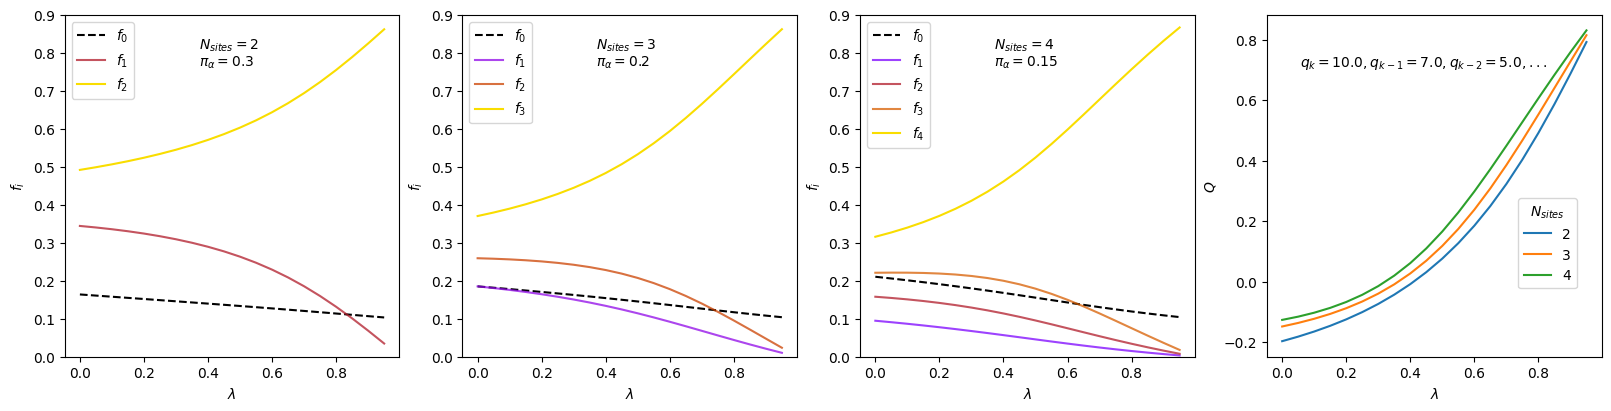

In [16]:
Nsitess = [2,3,4]
pis = [0.3,0.2,0.15]
qk = 10.0
qkmin1 = 7.0
dq = 2.0

fig, ax = plt.subplots(1,4, figsize=(16,4), constrained_layout=True)
for j,(Nsites,pi) in enumerate(zip(Nsitess,pis)):
    fs_colors = plt.cm.gnuplot(np.linspace(0,0.95,Nsites+1))
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[j].plot(df['l'], df[f'f0'], color=fs_colors[0], ls='--', label='$f_0$')
    for k in range(1,Nsites):
        ax[j].plot(df['l'], df[f'f{k}'], color=fs_colors[k], label=f'$f_{k}$', alpha=0.75)
    ax[j].plot(df['l'], df[f'f{Nsites}'], color=fs_colors[-1], label=f'$f_{Nsites}$')
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[-1].plot(df['l'], df['Q'], label=Nsites)
for i in range(len(Nsitess)):
    ax[i].text(0.4,0.9,fr'$N_{{sites}} = {i+2}$', transform=ax[i].transAxes)
    ax[i].text(0.4,0.85, fr'$\pi_{{\alpha}} = {pis[i]}$', transform=ax[i].transAxes)
    ax[i].legend()
    ax[i].set_xlabel('$\lambda$')
    ax[i].set_ylabel('$f_i$')
    ax[i].set_ylim(0.0,0.9)
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$', transform = ax[-1].transAxes)
ax[-1].legend(title=r'$N_{sites}$', loc=(0.75,0.2))
ax[-1].set_xlabel('$\lambda$')
ax[-1].set_ylabel('$Q$')
fig.savefig(f'varNsites_up_to_{Nsitess[-1]}_sumpi_const_{pis[0]*Nsitess[0]}_qk_{qk}_qkmin1_{qkmin1}_dq{dq}.png')

# just f0,fk Q

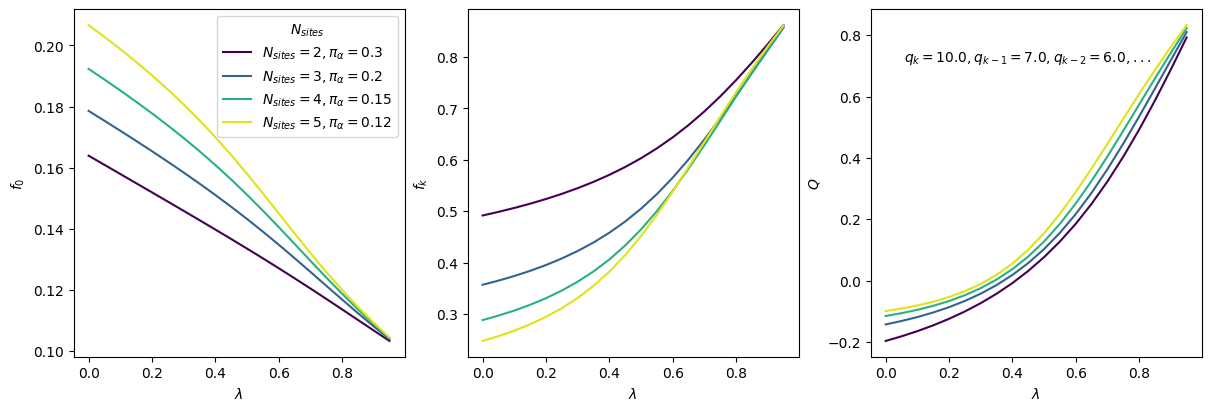

In [26]:
Nsitess = [2,3,4,5]
pis = [0.3,0.2,0.15,0.12]
Nsites_colors = plt.cm.viridis(np.linspace(0,0.95,len(Nsitess)))
qk = 10.0
qkmin1 = 7.0
dq = 1.0

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for i in range(3):
    ax[i].set_xlabel('$\lambda$')
ax[0].set_ylabel('$f_0$')
ax[1].set_ylabel('$f_k$')
ax[2].set_ylabel('$Q$')

for Nsites,Nsc,pi in zip(Nsitess,Nsites_colors,pis):
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[0].plot(df['l'], df[f'f0'], color=Nsc, label=fr'$N_{{sites}} = {Nsites}, \pi_{{\alpha}} = {pi}$')
    ax[1].plot(df['l'], df[f'f{Nsites}'], color=Nsc)
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[2].plot(df['l'], df['Q'], color=Nsc)
ax[0].legend(title=r'$N_{sites}$')
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$', transform = ax[-1].transAxes)
fig.savefig(f'varNsites_sumpi_const_{pis[0]*Nsitess[0]}_qk_{qk}_qkmin1_{qkmin1}_dq_{dq}_compare_f0_fk.png')

# Asymmetric pis

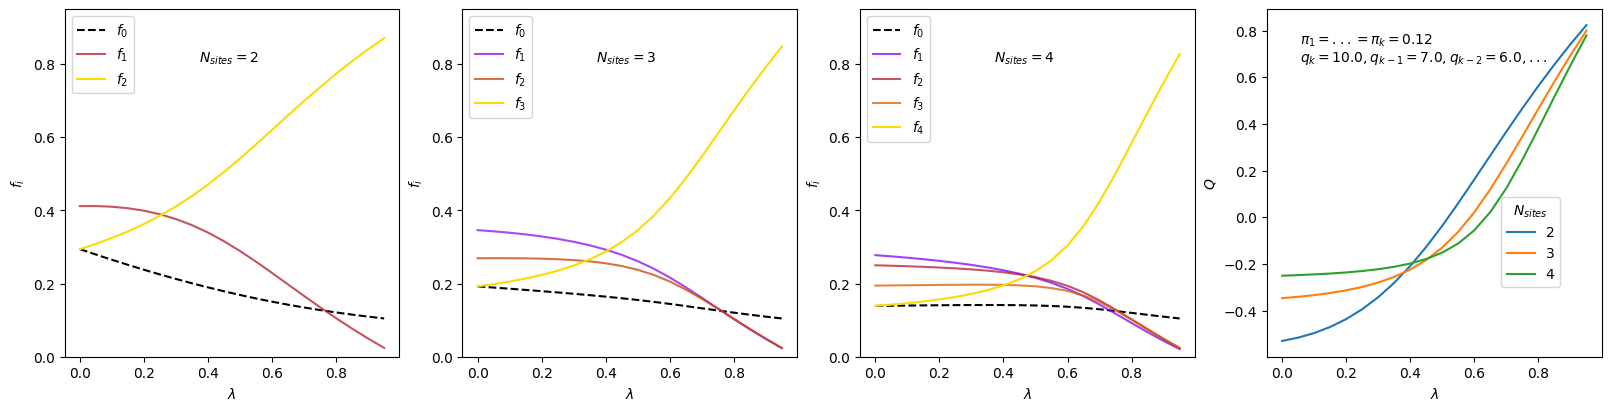

In [29]:
Nsitess = [2,3,4]
Ns_pis = {2:[0.2,0.1], 3:[0.3,0.2,0.1], 4:[0.4,0.3,0.2,0.1]}
# Ns_pis = {2:[0.4,0.2], 3:[0.3,0.2,0.1], 4:[0.25,0.18,0.12,0.05]}
qk = 10.0
qkmin1 = 7.0
dq = 1.0

if len(Nsitess) == 2 or len(Nsitess) == 3:
    fig, ax = plt.subplots(1,len(Nsitess)+1, figsize=((len(Nsitess)+1)*4,4), constrained_layout=True)
    for i in range(len(Nsitess)+1):
        ax[i].set_xlabel('$\lambda$')
    for i in range(len(Nsitess)):
        ax[i].set_ylabel('$f_i$')
        ax[i].set_ylim(0.0,0.95)
    ax[-1].set_ylabel('$Q$')


for j,(Nsites,pis) in enumerate(Ns_pis.items()):
    fs_colors = plt.cm.gnuplot(np.linspace(0,0.95,Nsites+1))
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pis[i-1]} &'
    query = query[:-2]
    df = df.query(query)
    ax[j].plot(df['l'], df[f'f0'], ls='--', color=fs_colors[0], label='$f_0$')
    for k in range(1,Nsites):
        # varying alpha:
        # ax[j].plot(df['l'], df[f'f{k}'], label=f'$f_{k}$', color=fs_colors[k], alpha=1.0-k*0.3)
        # constant alpha:
        ax[j].plot(df['l'], df[f'f{k}'], label=f'$f_{k}$', color=fs_colors[k], alpha=0.75)
    ax[j].plot(df['l'], df[f'f{Nsites}'], color=fs_colors[-1], label=f'$f_{Nsites}$')
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[-1].plot(df['l'], df['Q'], label=Nsites)
    ax[j].text(0.4,0.85, rf'$N_{{sites}} = {Nsites}$', transform=ax[j].transAxes)
    ax[j].legend()
ax[-1].text(0.10, 0.9, rf'$\pi_1 = ... = \pi_k = {pi}$', transform = ax[-1].transAxes)
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$', transform = ax[-1].transAxes)
ax[-1].legend(title=r'$N_{sites}$', loc=(0.7,0.2))
# fig.savefig(f'varNsites_up_to_{Nsitess[-1]}_pi_const_{pi}_qk_{qk}_qkmin1_{qkmin1}_dq_{dq}.png')

## Figure for the paper: symmetric case (pis const, sumpi const); asymmetric as SupFig?
<p> Also, we show pis=0.2; pi=0.5 or pi=10 up to 10 sites as supplementary? </p>

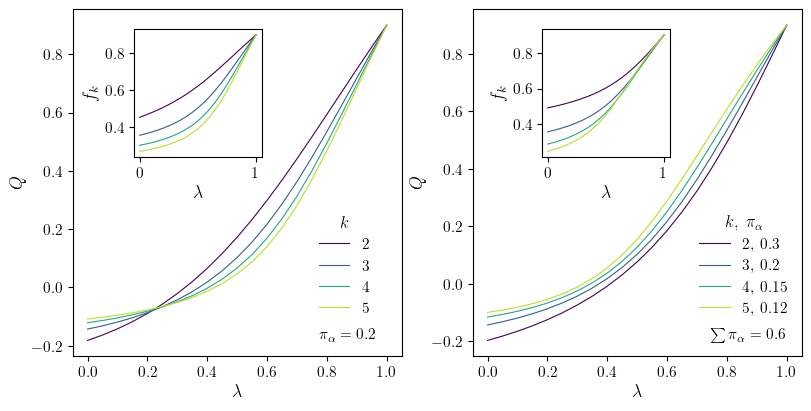

In [73]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

# symmetric:
pi_ct = 0.2
qk = 10.0
qkmin1 = 7.0
dq=1.0
Ns_pis = {2:[pi_ct]*2, 3:[pi_ct]*3, 4:[pi_ct]*4, 5:[pi_ct]*5}
Ns_colors = plt.cm.viridis(np.linspace(0,0.9,len(Ns_pis.keys())))

fig, ax = plt.subplots(1,2,figsize=(8,4), constrained_layout=True)
left, bottom, width, height = [0.16, 0.62, 0.16, 0.32]
ax_inset0 = fig.add_axes([left, bottom, width, height])
ax_inset1 = fig.add_axes([left+0.51, bottom, width, height])
for axis in [ax[0], ax[1], ax_inset0, ax_inset1]:
    axis.set_xlabel('$\lambda$')
ax[0].set_ylabel('$Q$')
ax[1].set_ylabel('$Q$')
ax_inset0.set_ylabel('$f_k$')
ax_inset1.set_ylabel('$f_k$')


for j,(Nsites,pis) in enumerate(Ns_pis.items()):
    Nsc = Ns_colors[j]
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pis[i-1]} &'
    query = query[:-2]
    dfaux = df.query(query).copy()
    lambda1_row = pis + qs + [1.0] + [1/qk,] + [0.0]*(Nsites-1) + [1-1/qk,'N']
    dfaux.loc[len(dfaux.index)] = lambda1_row
    dfaux['Q'] = dfaux[f'f{Nsites}']-2*dfaux[f'f{Nsites-1}']
    ax[0].plot(dfaux['l'], dfaux['Q'], color=Nsc, label=Nsites, lw=0.8)
    ax_inset0.plot(dfaux['l'], dfaux[f'f{Nsites}'], color=Nsc, lw=0.8)

#RIGHT:
Nsitess = [2,3,4,5]
pis = [0.3,0.2,0.15,0.12]
sumpi_ct = Nsitess[0]*pis[0]
Ns_pis = {}
for Nsites,pi in zip(Nsitess,pis):
    Ns_pis[Nsites] = [pi]*Nsites

for j,(Nsites,pis) in enumerate(Ns_pis.items()):
    Nsc = Ns_colors[j]
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pis[i-1]} &'
    query = query[:-2]
    dfaux = df.query(query).copy()
    lambda1_row = pis + qs + [1.0] + [1/qk,] + [0.0]*(Nsites-1) + [1-1/qk,'N']
    dfaux.loc[len(dfaux.index)] = lambda1_row
    dfaux['Q'] = dfaux[f'f{Nsites}']-2*dfaux[f'f{Nsites-1}']
    ax[1].plot(dfaux['l'], dfaux['Q'], color=Nsc, label=fr'${Nsites}, \; {pis[0]}$', lw=0.8)
    ax_inset1.plot(dfaux['l'], dfaux[f'f{Nsites}'], color=Nsc, lw=0.8)

ax[0].legend(title='$k$', loc=(0.73, 0.1), fontsize=11, frameon=False, title_fontsize=12)
ax[0].text(0.75, 0.05, fr'$\pi_{{\alpha}} = {pi_ct}$', fontsize=11, transform=ax[0].transAxes)
ax[1].legend(title=r'$k, \; \pi_{\alpha}$', loc=(0.67, 0.1), fontsize=11, frameon=False, title_fontsize=12)
# sumpi_ct = list(Ns_pis.keys())[0]*list(Ns_pis.values())[0][0]
ax[1].text(0.72, 0.05, fr'$\sum \pi_{{\alpha}} = {sumpi_ct}$', fontsize=11, transform=ax[1].transAxes)

fig.savefig(f'varNsites_sym_qk_{qk}_qkmin1_{qkmin1}_dq_{dq}_left_pict_{pi_ct}_right_sumpict_{sumpi_ct}.pdf')

## Inferior options with equal quality: 

### Keeping pi constant accross sites:

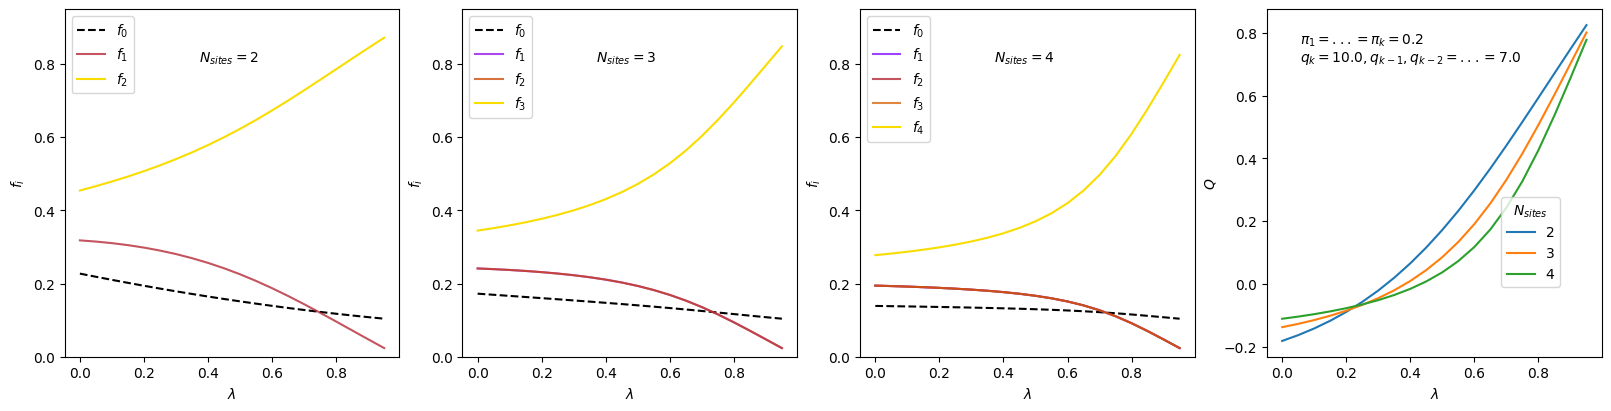

In [4]:
Nsitess = [2,3,4]
pi = 0.2
# Nsitess = [2,3]
# pi = 0.3
qk = 10.0
qlow = 7.0

if len(Nsitess) == 2 or len(Nsitess) == 3:
    fig, ax = plt.subplots(1,len(Nsitess)+1, figsize=((len(Nsitess)+1)*4,4), constrained_layout=True)
    for i in range(len(Nsitess)+1):
        ax[i].set_xlabel('$\lambda$')
    for i in range(len(Nsitess)):
        ax[i].set_ylabel('$f_i$')
        ax[i].set_ylim(0.0,0.95)
    ax[-1].set_ylabel('$Q$')


for j,(Nsites) in enumerate(Nsitess):
    fs_colors = plt.cm.gnuplot(np.linspace(0,0.95,Nsites+1))
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qlow]*(Nsites-1)
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[j].plot(df['l'], df[f'f0'], ls='--', color=fs_colors[0], label='$f_0$')
    for k in range(1,Nsites):
        # varying alpha:
        # ax[j].plot(df['l'], df[f'f{k}'], label=f'$f_{k}$', color=fs_colors[k], alpha=1.0-k*0.3)
        # constant alpha:
        ax[j].plot(df['l'], df[f'f{k}'], label=f'$f_{k}$', color=fs_colors[k], alpha=0.75)
    ax[j].plot(df['l'], df[f'f{Nsites}'], color=fs_colors[-1], label=f'$f_{Nsites}$')
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[-1].plot(df['l'], df['Q'], label=Nsites)
    ax[j].text(0.4,0.85, rf'$N_{{sites}} = {Nsites}$', transform=ax[j].transAxes)
    ax[j].legend()
ax[-1].text(0.10, 0.9, rf'$\pi_1 = ... = \pi_k = {pi}$', transform = ax[-1].transAxes)
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}}, q_{{k-2}} = ... = {qlow}$', transform = ax[-1].transAxes)
ax[-1].legend(title=r'$N_{sites}$', loc=(0.7,0.2))
# fig.savefig(f'varNsites_up_to_{Nsitess[-1]}_pi_const_{pi}_qk_{qk}_qkmin1_{qkmin1}_dq_{dq}.png')

### just f0, fk and consensus

Text(0.1, 0.85, '$q_k = 10.0, q_{k-1}, q_{k-2} = ... = 7.0$')

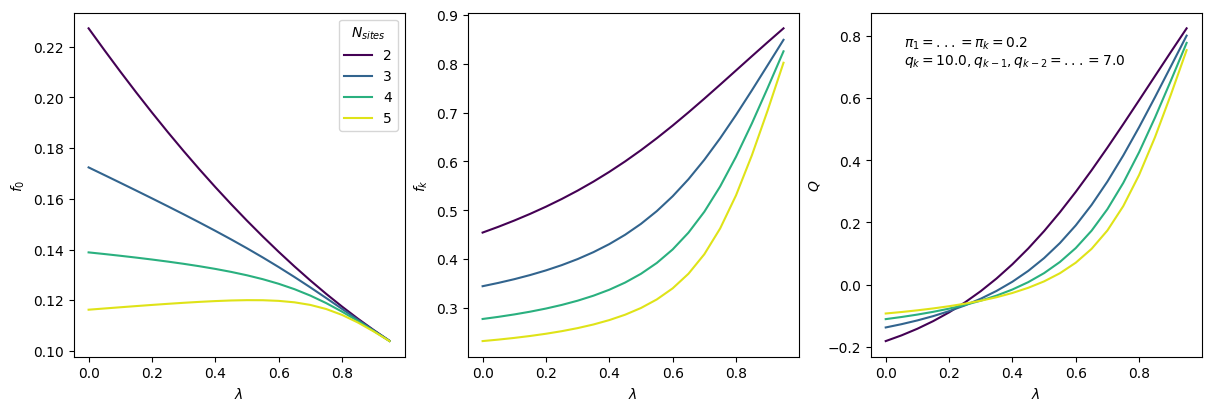

In [5]:
Nsitess = [2,3,4,5]
Nsites_colors = plt.cm.viridis(np.linspace(0,0.95,len(Nsitess)))
pi = 0.2
qk = 10.0
qlow = 7.0

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for i in range(3):
    ax[i].set_xlabel('$\lambda$')
ax[0].set_ylabel('$f_0$')
ax[1].set_ylabel('$f_k$')
ax[2].set_ylabel('$Q$')

for Nsites,Nsc in zip(Nsitess,Nsites_colors):
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qlow]*(Nsites-1)
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[0].plot(df['l'], df[f'f0'], color=Nsc, label=Nsites)
    ax[1].plot(df['l'], df[f'f{Nsites}'], color=Nsc)
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[2].plot(df['l'], df['Q'], color=Nsc)
ax[0].legend(title=r'$N_{sites}$')
ax[-1].text(0.10, 0.9, rf'$\pi_1 = ... = \pi_k = {pi}$', transform = ax[-1].transAxes)
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}}, q_{{k-2}} = ... = {qlow}$', transform = ax[-1].transAxes)

## Keeping sumpi constant

Text(0.1, 0.85, '$q_k = 10.0, q_{k-1} = 7.0, q_{k-2} = 6.0, ...$')

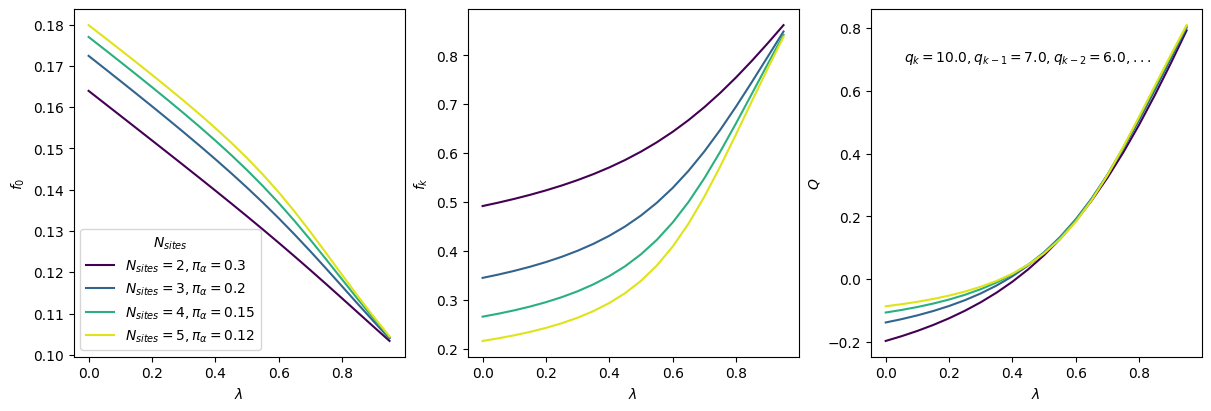

In [12]:
Nsitess = [2,3,4,5]
pis = [0.3,0.2,0.15,0.12]
Nsites_colors = plt.cm.viridis(np.linspace(0,0.95,len(Nsitess)))
qk = 10.0
qkmin1 = 7.0

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for i in range(3):
    ax[i].set_xlabel('$\lambda$')
ax[0].set_ylabel('$f_0$')
ax[1].set_ylabel('$f_k$')
ax[2].set_ylabel('$Q$')

for Nsites,Nsc,pi in zip(Nsitess,Nsites_colors,pis):
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1]*(Nsites-1)
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[0].plot(df['l'], df[f'f0'], color=Nsc, label=fr'$N_{{sites}} = {Nsites}, \pi_{{\alpha}} = {pi}$')
    ax[1].plot(df['l'], df[f'f{Nsites}'], color=Nsc)
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[2].plot(df['l'], df['Q'], color=Nsc)
ax[0].legend(title=r'$N_{sites}$')
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$', transform = ax[-1].transAxes)

## Comparison of decreasing qualities vs inferiors with equal quality

Text(0.1, 0.85, '$q_k = 10.0, q_{k-1}, q_{k-2} = ... = 7.0$')

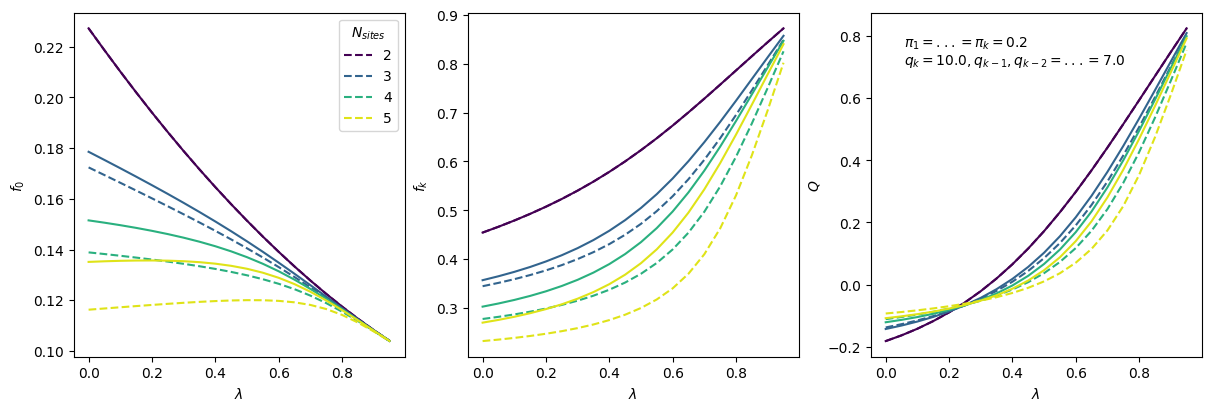

In [11]:
Nsitess = [2,3,4,5]
Nsites_colors = plt.cm.viridis(np.linspace(0,0.95,len(Nsitess)))
pi = 0.2
qk = 10.0
qkmin1 = 7.0
dq = 1.0

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for i in range(3):
    ax[i].set_xlabel('$\lambda$')
ax[0].set_ylabel('$f_0$')
ax[1].set_ylabel('$f_k$')
ax[2].set_ylabel('$Q$')

for Nsites,Nsc in zip(Nsitess,Nsites_colors):
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    # inferiors with equal quality:
    qs = [qkmin1]*(Nsites-1)
    qs.append(qk)
    query = "ic == 'N' & "
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[0].plot(df['l'], df[f'f0'], color=Nsc, ls='--', label=Nsites)
    ax[1].plot(df['l'], df[f'f{Nsites}'], color=Nsc, ls='--')
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[2].plot(df['l'], df['Q'], color=Nsc, ls='--')
    # inferiors decreasing quality:
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax[0].plot(df['l'], df[f'f0'], color=Nsc)
    ax[1].plot(df['l'], df[f'f{Nsites}'], color=Nsc)
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[2].plot(df['l'], df['Q'], color=Nsc)
ax[0].legend(title=r'$N_{sites}$')
ax[-1].text(0.10, 0.9, rf'$\pi_1 = ... = \pi_k = {pi}$', transform = ax[-1].transAxes)
ax[-1].text(0.10, 0.85, rf'$q_k = {qk}, q_{{k-1}}, q_{{k-2}} = ... = {qlow}$', transform = ax[-1].transAxes)

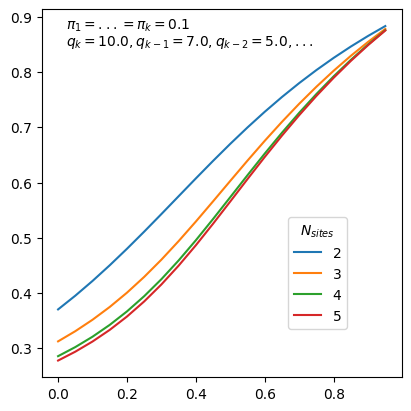

In [19]:
Nsitess = [2,3,4,5]
pi = 0.1
qk = 10.0
qkmin1 = 7.0
dq = 2.0

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
for Nsites in Nsitess:
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=Nsites)
fig.text(0.15,0.94, rf'$\pi_1 = ... = \pi_k = {pi}$')
fig.text(0.15,0.90, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$')
fig.legend(title=r'$N_{sites}$', loc=(0.7,0.2))

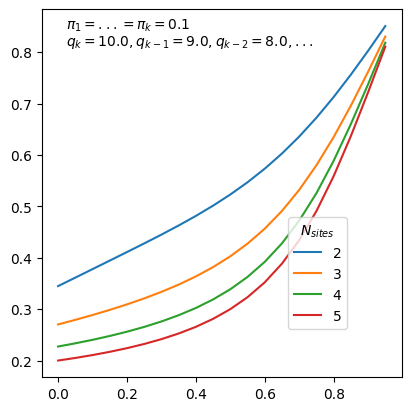

In [20]:
Nsitess = [2,3,4,5]
pi = 0.1
qk = 10.0
qkmin1 = 9.0
dq = 1.0

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
for Nsites in Nsitess:
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=Nsites)
fig.text(0.15,0.94, rf'$\pi_1 = ... = \pi_k = {pi}$')
fig.text(0.15,0.90, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$')
fig.legend(title=r'$N_{sites}$', loc=(0.7,0.2))

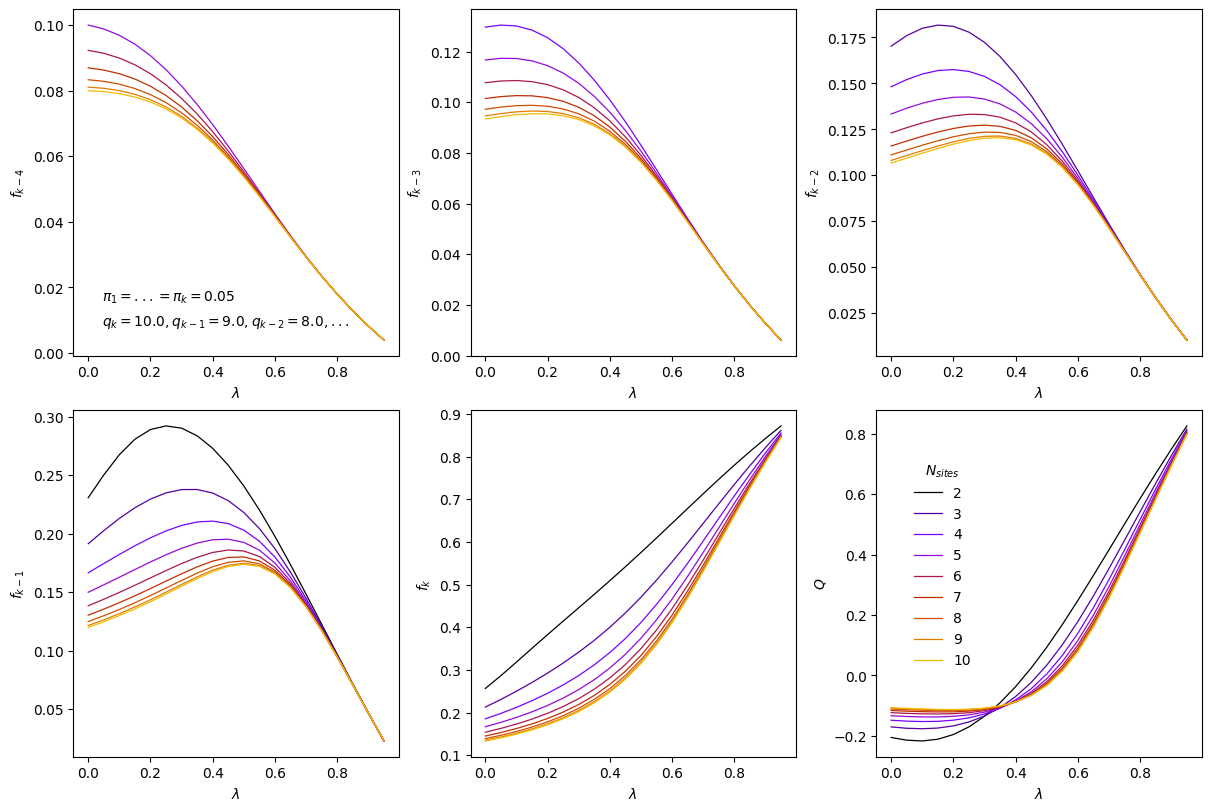

In [34]:
Nsitess = [2,3,4,5,6,7,8,9,10]
site_color = plt.cm.gnuplot(np.linspace(0,0.9,len(Nsitess)))
pi = 0.05
qk = 10.0
qkmin1 = 9.0
dq = 1.0

# fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
fig, ax = plt.subplots(2,3, figsize=(12,8), constrained_layout=True)
for Nsites,sc in zip(Nsitess,site_color):
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    # ax.plot(df['l'], df[f'f{Nsites}'], color=sc, lw=0.9, label=Nsites)
    if Nsites-4 >= 1:
        ax[0,0].plot(df['l'], df[f'f{Nsites-4}'], color=sc, lw=0.9)
    if Nsites-3 >=1:
        ax[0,1].plot(df['l'], df[f'f{Nsites-3}'], color=sc, lw=0.9)
    if Nsites-2 >=1:
        ax[0,2].plot(df['l'], df[f'f{Nsites-2}'], color=sc, lw=0.9)
    ax[1,0].plot(df['l'], df[f'f{Nsites-1}'], color=sc, lw=0.9)
    ax[1,1].plot(df['l'], df[f'f{Nsites}'], color=sc, lw=0.9)
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    ax[1,2].plot(df['l'], df['Q'], color=sc, lw=0.9, label=Nsites)

ax[0,0].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-4}$')
ax[0,1].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-3}$')
ax[0,2].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-2}$')
ax[1,0].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-1}$')
ax[1,1].set(xlabel=r'$\lambda$', ylabel=r'$f_{k}$')
ax[1,2].set(xlabel=r'$\lambda$', ylabel=r'$Q$')
fig.text(0.08,0.63, rf'$\pi_1 = ... = \pi_k = {pi}$')
fig.text(0.08,0.6, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$')
fig.legend(title=r'$N_{sites}$', loc=(0.75,0.17), frameon=False)
fig.savefig(f'many_sites_pi_{pi}_qk_{qk}_dq_{dq}.png')

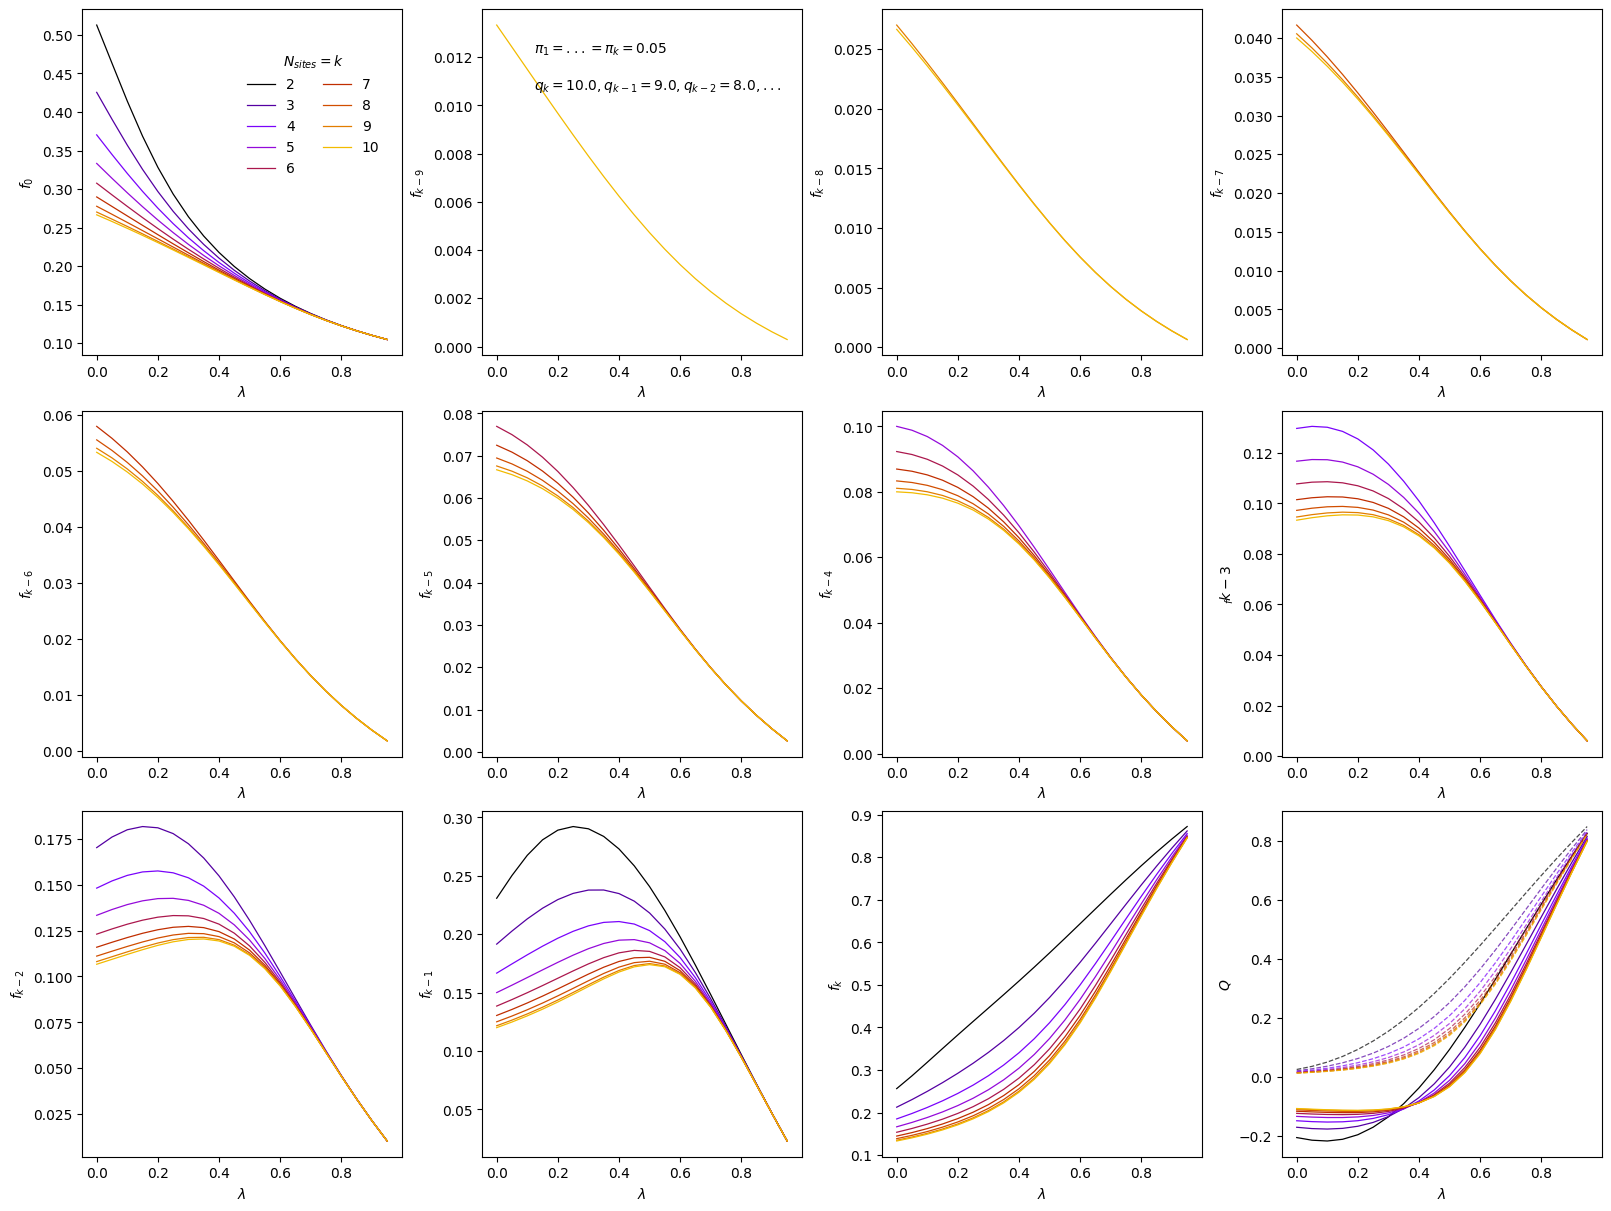

In [43]:
Nsitess = [2,3,4,5,6,7,8,9,10]
site_color = plt.cm.gnuplot(np.linspace(0,0.9,len(Nsitess)))
pi = 0.05
qk = 10.0
qkmin1 = 9.0
dq = 1.0

# fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
fig, ax = plt.subplots(3,4, figsize=(16,12), constrained_layout=True)
for Nsites,sc in zip(Nsitess,site_color):
    resFile = f'results_int_Nsites_{Nsites}.csv'
    df = pd.read_csv(path + '/' + resFile)
    qs = [qkmin1-(Nsites-2-i)*dq for i in range(Nsites-1)]
    qs.append(qk)
    query = "ic == 'N' & "
    # query = ''
    for i in range(1,Nsites+1):
        query += f'q{i} == {qs[i-1]} & pi{i} == {pi} &'
    query = query[:-2]
    df = df.query(query)
    # ax.plot(df['l'], df[f'f{Nsites}'], color=sc, lw=0.9, label=Nsites)
    ax[0,0].plot(df['l'], df[f'f0'], color=sc, lw=0.9, label=Nsites)
    if Nsites-9 >= 1:
        ax[0,1].plot(df['l'], df[f'f{Nsites-9}'], color=sc, lw=0.9)
    if Nsites-8 >= 1:
        ax[0,2].plot(df['l'], df[f'f{Nsites-8}'], color=sc, lw=0.9)
    if Nsites-7 >= 1:
        ax[0,3].plot(df['l'], df[f'f{Nsites-7}'], color=sc, lw=0.9)
    if Nsites-6 >= 1:
        ax[1,0].plot(df['l'], df[f'f{Nsites-6}'], color=sc, lw=0.9)
    if Nsites-5 >= 1:
        ax[1,1].plot(df['l'], df[f'f{Nsites-5}'], color=sc, lw=0.9)
    if Nsites-4 >= 1:
        ax[1,2].plot(df['l'], df[f'f{Nsites-4}'], color=sc, lw=0.9)
    if Nsites-3 >=1:
        ax[1,3].plot(df['l'], df[f'f{Nsites-3}'], color=sc, lw=0.9)
    if Nsites-2 >=1:
        ax[2,0].plot(df['l'], df[f'f{Nsites-2}'], color=sc, lw=0.9)
    ax[2,1].plot(df['l'], df[f'f{Nsites-1}'], color=sc, lw=0.9)
    ax[2,2].plot(df['l'], df[f'f{Nsites}'], color=sc, lw=0.9)
    df['Q'] = df[f'f{Nsites}']-2*df[f'f{Nsites-1}']
    df['Qsim'] = df[f'f{Nsites}']-df[f'f{Nsites-1}']
    ax[2,3].plot(df['l'], df['Q'], color=sc, lw=0.9)
    ax[2,3].plot(df['l'], df['Qsim'], color=sc, lw=0.9, ls='--', alpha=0.7)

ax[0,0].set(xlabel=r'$\lambda$', ylabel=r'$f_0$')
ax[0,1].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-9}$')
ax[0,2].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-8}$')
ax[0,3].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-7}$')
ax[1,0].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-6}$')
ax[1,1].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-5}$')
ax[1,2].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-4}$')
ax[1,3].set(xlabel=r'$\lambda$', ylabel=r'$_f{k-3}$')
ax[2,0].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-2}$')
ax[2,1].set(xlabel=r'$\lambda$', ylabel=r'$f_{k-1}$')
ax[2,2].set(xlabel=r'$\lambda$', ylabel=r'$f_{k}$')
ax[2,3].set(xlabel=r'$\lambda$', ylabel=r'$Q$')
fig.text(0.33,0.96, rf'$\pi_1 = ... = \pi_k = {pi}$')
fig.text(0.33,0.93, rf'$q_k = {qk}, q_{{k-1}} = {qkmin1}, q_{{k-2}} = {qkmin1-dq}, ...$')
fig.legend(title=r'$N_{sites} = k$', loc=(0.15,0.85), frameon=False, ncol=2)
fig.savefig(f'many_sites_pi_{pi}_qk_{qk}_dq_{dq}.png')